## <b> <center> Python Exam - Part 2 Practical</center> </b>

In [1]:
# Import libraries/packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
# Set the working directory

file_path = ("C:\\Users\\abc\\OneDrive - UGent\\Documenten\\Derick Malavi_PhD Docs_UGent\\Professional Courses\\ALX Data Science\\Python\\MD_agric_exam.csv")

In [3]:
# Import the csv file

MD_data = pd.read_csv(file_path)

In [4]:
# Check the first few rows

MD_data.head(6)

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava
5,2274,270.45100,1665.2,-7.2,34.3,5.873082,0.001545,3.9,1.743458,banana


In [5]:
# Check the last few rows
MD_data.tail(6)

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
994,3424,605.52277,1080.6,-4.8,30.7,4.984128,0.327851,3.7,2.102438,potato
995,2202,572.95935,625.6,-5.5,31.0,5.258964,0.086330,1.2,0.750675,wheat
996,2531,552.80945,398.1,-5.9,33.4,4.607136,0.130178,0.8,0.449790,wheat
997,1040,678.22504,564.4,-4.6,31.7,5.567556,0.448149,1.2,0.492988,maize
998,58,792.65370,928.5,-3.3,31.2,5.102048,0.387350,1.1,0.597557,potato
999,3334,747.69850,981.5,-3.7,31.0,6.715882,0.541706,11.1,2.867815,coffee


In [6]:
# Check the number of rows and columns
MD_data.shape # The data set has 1000 observations and 10 covariates

(1000, 10)

In [7]:
# Statistical summary 

MD_data.describe()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2779.486000,628.136035,1197.734700,-4.504100,30.89460,5.603899,2.233740e-01,3.962400,2.101536
std,1595.068372,179.098546,497.794699,1.568117,1.92225,0.802154,2.288665e-01,3.459036,1.926694
min,1.000000,35.910797,110.100000,-9.700000,25.10000,3.701838,5.397448e-10,0.500000,0.174857
25%,1442.250000,504.392825,771.575000,-5.600000,29.57500,5.018775,4.449419e-02,1.500000,0.786612
50%,2728.500000,657.468975,1194.900000,-4.400000,30.90000,5.562078,1.661962e-01,2.900000,1.478622
75%,4133.000000,761.075752,1616.900000,-3.300000,32.20000,6.201437,3.077840e-01,4.700000,2.519811
max,5632.000000,1003.943700,2408.500000,-1.200000,37.30000,7.484683,9.954134e-01,15.000000,12.695224


In [8]:
# Check for any missing values

MD_data.isnull().sum()

Field_ID             0
Elevation            0
Rainfall             0
Min_temperature_C    0
Max_temperature_C    0
pH                   0
Pollution_level      0
Plot_size            0
Annual_yield         0
Crop_type            0
dtype: int64

In [9]:
# Number of unique crop types in the dataset

unique_crop_types = MD_data['Crop_type'].nunique()

print(f'There are {unique_crop_types} unique crop types in our dataset')

There are 8 unique crop types in our dataset


In [10]:
# Maximum annual yield all the crops

max_annual_yield = MD_data.groupby('Crop_type')['Annual_yield'].max().round(2).reset_index()

max_annual_yield


,Crop_type,Annual_yield
0,banana,7.44
1,cassava,7.73
2,coffee,7.36
3,maize,8.65
4,potato,8.87
5,rice,10.51
6,tea,12.70
7,wheat,8.99


In [11]:
max_annual_yield_wheat = MD_data[MD_data['Crop_type'] == 'wheat']['Annual_yield'].max()
round(max_annual_yield_wheat,2)

8.99

In [12]:
# Total rainfall for crop types where the average pollution level is above 0.2 (grouped by crop type)

# Filter the DataFrame where Pollution_level is greater than 0.2
filtered_data = MD_data[MD_data['Pollution_level'] > 0.2]

# Group by Crop_type and calculate the mean Rainfall
total_rainfall = filtered_data.groupby("Crop_type")['Rainfall'].sum()

print(total_rainfall)


Crop_type
banana     32765.4
cassava    90085.7
coffee     51655.2
maize      38110.5
potato     66653.0
rice        6362.4
tea        93523.5
wheat      99746.9
Name: Rainfall, dtype: float64


In [13]:
# Total rainfall for crop types where the average pollution level is above 0.2 (without groupings)

total_rainfall_2 = filtered_data['Rainfall'].sum().round(2)

print(total_rainfall_2)


478902.6


In [14]:
# A function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. 

MD_data['temp_range'] = MD_data['Max_temperature_C'] - MD_data['Min_temperature_C']
MD_data.head()

# Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`.

filtered_data_temp = MD_data[['Field_ID','temp_range']]

#Check selected IDs

# Filter the DataFrame to include only specified Field_IDs
filtered_data_temp_IDs = filtered_data_temp[filtered_data_temp['Field_ID'].isin([1458, 1895, 5443])]

print(filtered_data_temp_IDs)


     Field_ID  temp_range
135      1458        40.7
644      1895        35.7
892      5443        33.4


In [15]:
# Code to calculate the total plot size for plots where the pH is less than 5.5.

total_plot_size = MD_data[['Plot_size','pH']]
filtered_plot_size = total_plot_size[total_plot_size['pH'] < 5.5].sum().round(2)

print(f'The total plot size for plots where the pH is less than 5.5 is {filtered_plot_size}')

The total plot size for plots where the pH is less than 5.5 is Plot_size    1731.90
pH           2305.26
dtype: float64


In [16]:
# Create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. 

df_temp = MD_data[(MD_data['Min_temperature_C'] < -5) & (MD_data['Max_temperature_C'] > 30)]

# How many rows are in the filtered dataset?

no_rows = df_temp['Field_ID']. count()

print(f'The total number of rows affected are {no_rows}')

The total number of rows affected are 319


In [17]:
# Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' 
#is larger than the median plot size of the dataset (round to 2 decimal places).

median_plot_size = MD_data['Plot_size'].median()

plot_size_greater_than_median = MD_data[MD_data['Plot_size'] > median_plot_size]

stdev_of_rainfall = np.round(np.std(plot_size_greater_than_median['Rainfall'], ddof=1), 2)

print(f'The standard deviation of the rainfall for plots where plot size is larger than the median plot size of the dataset is {stdev_of_rainfall}')

The standard deviation of the rainfall for plots where plot size is larger than the median plot size of the dataset is 470.09


In [18]:
# If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?
# Note: Use the first mode if there are multiple modes

mode_temp = MD_data['Max_temperature_C'].mode()

print(f'The most common maximum temperature is {mode_temp}')

# Least common crop type

crop_type = MD_data.groupby('Crop_type')['Crop_type'].count().sort_values(ascending=True)

print(crop_type)

# Concatenate 

conc_text = str(30.7) + 'ice'

print(conc_text)

The most common maximum temperature is 0    30.7
Name: Max_temperature_C, dtype: float64
Crop_type
rice        48
maize       82
coffee      99
banana     103
tea        137
cassava    141
potato     146
wheat      244
Name: Crop_type, dtype: int64
30.7ice


Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?

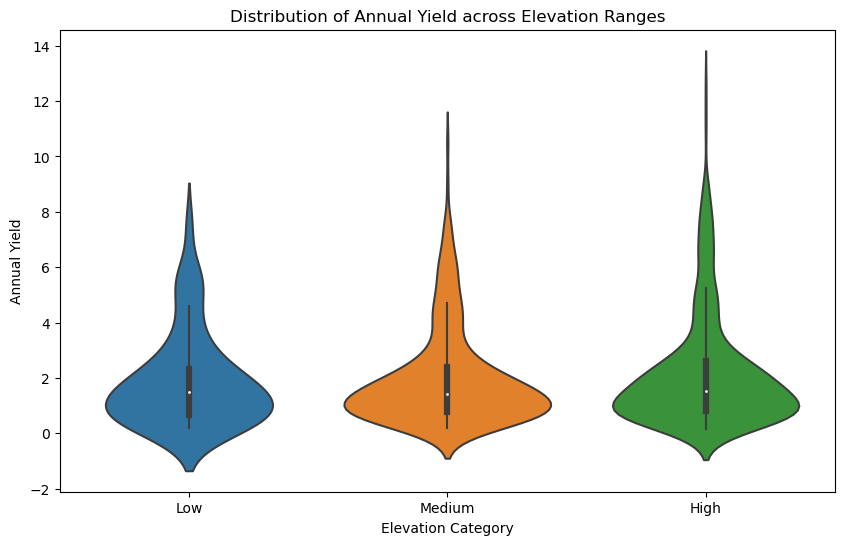

In [19]:
# Step 1: Create the elevation category based on the given ranges
def categorize_elevation(elevation):
    if elevation < 300:
        return 'Low'
    elif 300 <= elevation <= 600:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization function to create a new column in the DataFrame
MD_data['Elevation_Category'] = MD_data['Elevation'].apply(categorize_elevation)

# Step 2: Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_Category', y='Annual_yield', data=MD_data, order=['Low', 'Medium', 'High'])

# Step 3: Add titles and labels
plt.title('Distribution of Annual Yield across Elevation Ranges')
plt.xlabel('Elevation Category')
plt.ylabel('Annual Yield')

# Show the plot
plt.show()

In [20]:
# Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5), 
# write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?

# Define the list of unique crop types
crop_types = ["rice", "maize", "coffee", "banana", "tea", "cassava", "potato", "wheat"]

# Recursive function to sum the lengths of crop types
def sum_crop_lengths(crops):
    # Base case: if the list is empty, return 0
    if not crops:
        return 0
    # Recursive case: return the length of the first item plus the sum of the remaining items
    return len(crops[0]) + sum_crop_lengths(crops[1:])

# Calculate the sum
total_length = sum_crop_lengths(crop_types)
print("The sum of the integer values for each unique crop type is:", total_length)


The sum of the integer values for each unique crop type is: 42


Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places?

In [21]:
import scipy.stats as stats

# Filter the DataFrame for 'coffee' and 'banana' crop types
coffee_yield = MD_data[MD_data['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = MD_data[MD_data['Crop_type'] == 'banana']['Annual_yield']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(coffee_yield, banana_yield, equal_var=False)  # assuming unequal variances

# Round the p-value to three decimal places
p_value_rounded = round(p_value, 3)

print("The p-value for the t-test comparing 'Annual_yield' between 'coffee' and 'banana' is:", p_value_rounded)


The p-value for the t-test comparing 'Annual_yield' between 'coffee' and 'banana' is: 0.598
